In [3]:
import geojson
from geojson import Polygon
import json
import rasterio
from matplotlib import pyplot as plt
import csv
import rasterio.mask
import geopandas as gpd


In [33]:

def raster_array(image,geom):
    sumi=0
    
    with rasterio.open(image) as src:
        out_image,out_transform = rasterio.mask.mask(src, geom, all_touched=True, nodata=0.0,crop=True)
    raster_array=out_image[0]
    plt.imshow(out_image[0],vmin=0,vmax=1)
    for row in range (len(raster_array)):
         for col in range(len(raster_array[0])):
                if(raster_array[row][col]<0.0):
                    raster_array[row][col]=0.0
                sumi = sumi + raster_array[row][col]
    return sumi


In [4]:
orissa= gpd.read_file('E:/research/orissa_administrative')
orissa.to_file('orissaJson.geojson', driver='GeoJSON')

In [5]:
data=json.load(open("orissaJson.geojson"))

In [26]:
for x in data['features']:
           a=Polygon([x['geometry']['coordinates']])
           print(raster_array('viirsimages/SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif',[a]),x['properties']['NAME'])

15213.649990782142 Malkangiri
4141.610007122159 Dantewada
1098.4299993216991 Khammam
18071.830011308193 Bastar
12691.959995150566 Nabarangapur
1681.580001860857 Dhamtari
6766.730010345578 Vishakhapatnam
6862.320002369583 Raipur
10285.389987424016 Mahasamund
9161.90999918431 Nuapada
21231.259980544448 Kalahandi
19453.16998323798 Bargarh
22095.699966982007 Balangir
8372.150004521012 Rayagada
22866.25999251008 Raigarh
8907.149994447827 Vizianagaram
10260.75998327136 Srikakulam
17714.859977826476 Jharsuguda
7523.05998583138 Sonapur
15444.540024325252 Kandhamal
40478.54001916945 Sundargarh
7396.759995937347 Baudh
1356.6899958401918 Jashpur
8586.610007435083 Gajapati
26273.61998604238 Sambalpur
4165.530010789633 Gumla
31447.51998861134 Anugul
5783.890008300543 Debagarh
9400.940002411604 Nayagarh
30342.350013554096 Cuttack
25962.029991716146 Khordha
17576.719991609454 Singhbhum
34.91000019013882 Ranchi
21042.579998239875 Dhenkanal
30150.430000171065 Kendujhar
24619.59996947646 Mayurbhanj
3049

2019 28095.860020697117 Cuttack & Bhubaneshwar


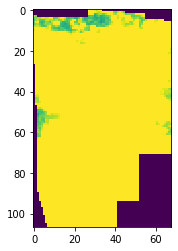

In [35]:
for x in data['features']:
    if(x['properties']['NAME']=='Cuttack & Bhubaneshwar'):
               a=Polygon([x['geometry']['coordinates']])
               print('2019',raster_array('viirsimages/SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif',[a]),x['properties']['NAME'])

2019 21231.259980544448 Kalahandi


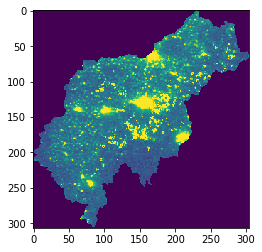

In [36]:
for x in data['features']:
    if(x['properties']['NAME']=='Kalahandi'):
               a=Polygon([x['geometry']['coordinates']])
               print('2019',raster_array('viirsimages/SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif',[a]),x['properties']['NAME'])

2019 25962.029991716146 Khordha


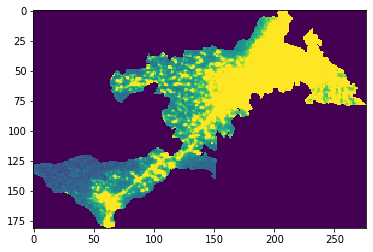

In [37]:
for x in data['features']:
    if(x['properties']['NAME']=='Khordha'):
               a=Polygon([x['geometry']['coordinates']])
               print('2019',raster_array('viirsimages/SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif',[a]),x['properties']['NAME'])

In [ ]:
with open('odisha_lum.csv.csv','w', newline='') as f:
    for img in images:
            thewriter=csv.writer(f)
            for x in data['features']:
                         a=Polygon([x['geometry']['coordinates']]
                         thewriter.writerow([img, raster_array(img,[a]), x['properties']['NAME']])